In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [3]:
sns.regplot(auto.mpg, auto.horsepower, order=1, ci=None, scatter_kws={'color':'r'})
plt.ylim(ymin=0);

NameError: name 'sns' is not defined

In [28]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(auto.mpg, with_mean=True, with_std=False).reshape(-1,1)
y = auto.horsepower

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

104.469387755
[-3.83888803]


In [29]:
est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,39.9359,0.717,55.660,0.000,38.525 41.347
horsepower,-0.1578,0.006,-24.489,0.000,-0.171 -0.145


In [30]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.reshape(-1,1))**2)/1000
min_rss

228.27166514049665

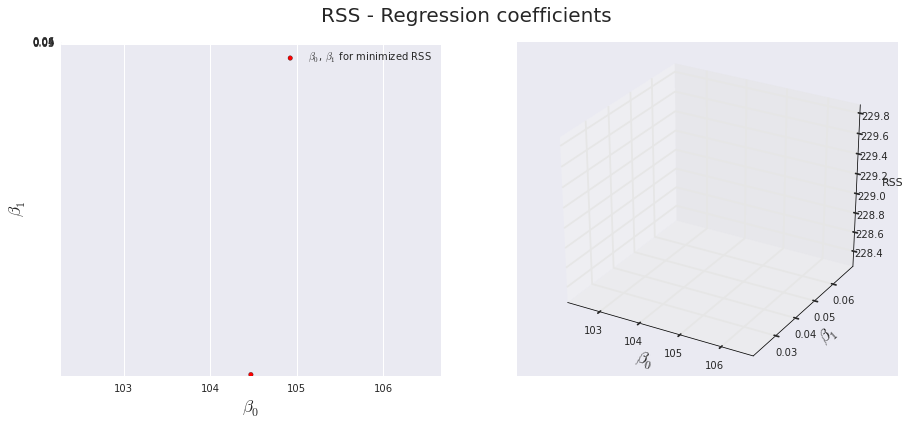

In [31]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

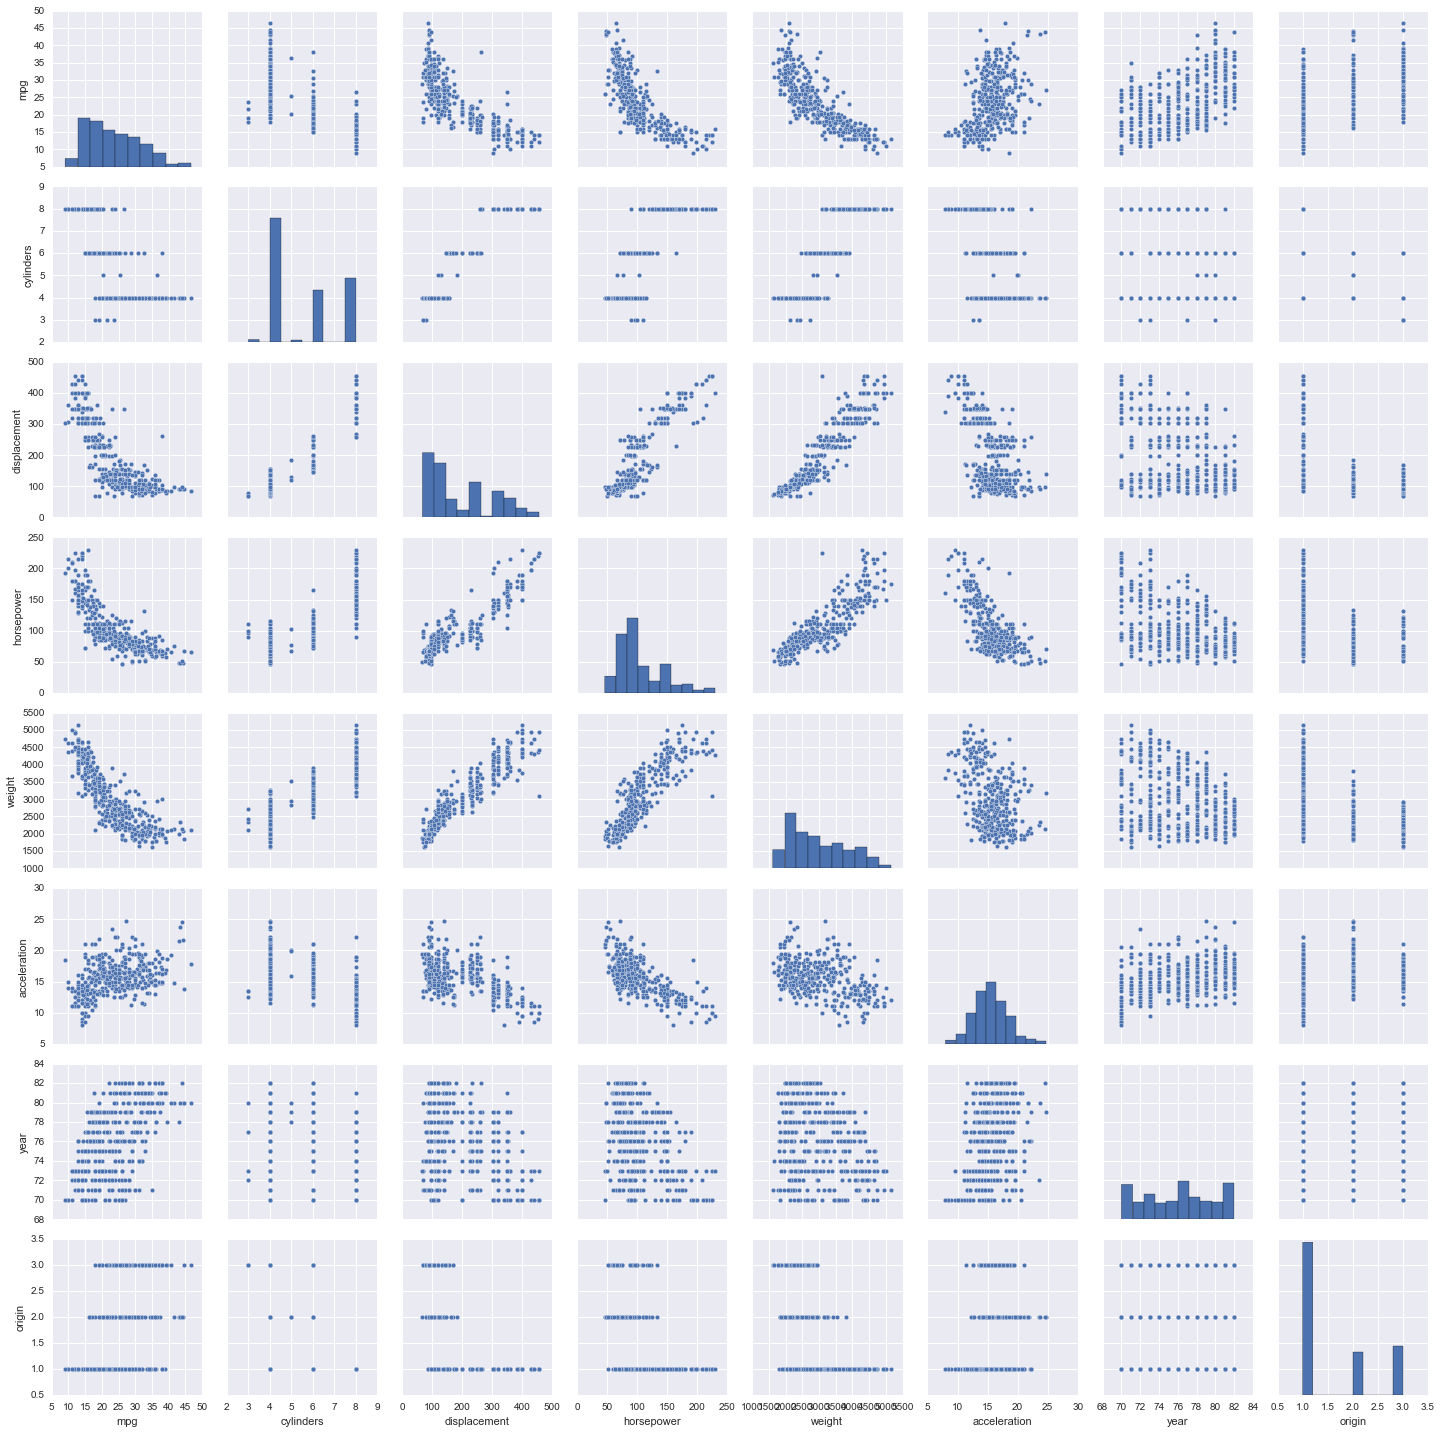

In [3]:
sns.pairplot(auto[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']]);

In [4]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [6]:
est = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350 -8.087
cylinders,-0.4934,0.323,-1.526,0.128,-1.129 0.142
displacement,0.0199,0.008,2.647,0.008,0.005 0.035
horsepower,-0.0170,0.014,-1.230,0.220,-0.044 0.010
weight,-0.0065,0.001,-9.929,0.000,-0.008 -0.005
acceleration,0.0806,0.099,0.815,0.415,-0.114 0.275
year,0.7508,0.051,14.729,0.000,0.651 0.851
origin,1.4261,0.278,5.127,0.000,0.879 1.973


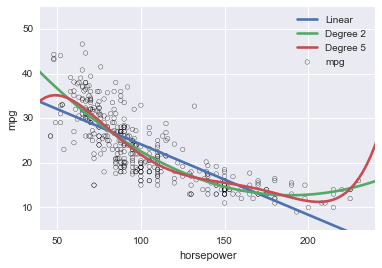

In [7]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k') 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [8]:
est = smf.ols('mpg ~ weight + acceleration + weight*acceleration', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,28.1398,4.872,5.776,0.000,18.562 37.718
weight,-0.0032,0.001,-2.168,0.031,-0.006 -0.000
acceleration,1.1174,0.310,3.608,0.000,0.508 1.726
weight:acceleration,-0.0003,9.69e-05,-2.875,0.004,-0.000 -8.81e-05


In [10]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,56.9001,1.800,31.604,0.000,53.360 60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527 -0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001 0.001


In [8]:
est = smf.ols('mpg ~ np.log(horsepower)', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,108.6997,3.050,35.644,0.000,102.704 114.695
np.log(horsepower),-18.5822,0.663,-28.034,0.000,-19.885 -17.279


# Excercise 10


In [9]:
carseats = pd.read_csv('Data/Carseats.csv', na_values='?').dropna()
carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 40.6+ KB


In [12]:
est = smf.ols('Sales ~ Price + Urban + US', carseats).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,13.0435,0.651,20.036,0.000,11.764 14.323
Urban[T.Yes],-0.0219,0.272,-0.081,0.936,-0.556 0.512
US[T.Yes],1.2006,0.259,4.635,0.000,0.691 1.710
Price,-0.0545,0.005,-10.389,0.000,-0.065 -0.044


In [13]:
# yi = 13.0435 + 1.2006 B(US-yes) -0.0545 B(price)
# Nullhypothesis can be rejected for US and Price
est = smf.ols('Sales ~ Price + US', carseats).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,13.0308,0.631,20.652,0.000,11.790 14.271
US[T.Yes],1.1996,0.258,4.641,0.000,0.692 1.708
Price,-0.0545,0.005,-10.416,0.000,-0.065 -0.044


In [51]:
regr = skl_lm.LinearRegression()

X = carseats[['Price', 'Age']].as_matrix()
y = carseats.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[-0.05648801 -0.04884661]
16.6419774484


In [28]:
carseats[['Sales','Price', 'Age']].describe()

,Sales,Price,Age
count,400.000000,400.000000,400.000000
mean,7.496325,115.795000,53.322500
std,2.824115,23.676664,16.200297
min,0.000000,24.000000,25.000000
25%,5.390000,100.000000,39.750000
50%,7.490000,117.000000,54.500000
75%,9.320000,131.000000,66.000000
max,16.270000,191.000000,80.000000


In [54]:
# Create a coordinate grid
Price = np.arange(0,200)
Age = np.arange(0,200)

B1, B2 = np.meshgrid(Price, Age, indexing='xy')
Z = np.zeros((Price.size, Age.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

(0, 16)

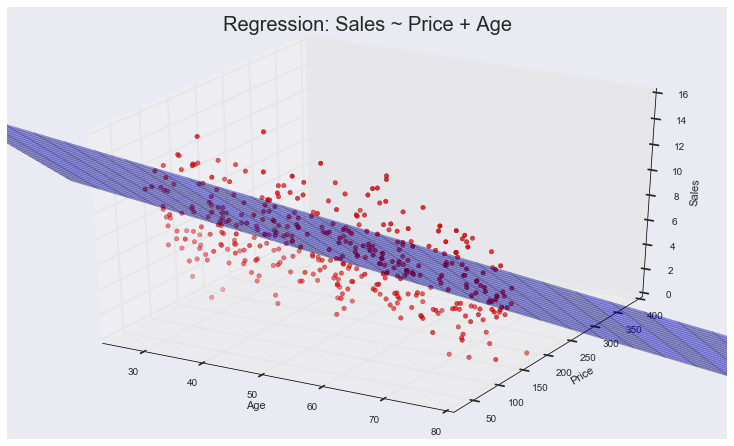

In [63]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Price + Age', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(carseats.Age, carseats.Price, carseats.Sales, c='r')

ax.set_xlabel('Age')
ax.set_xlim(24,80)
ax.set_ylabel('Price')
ax.set_ylim(20,400)
ax.set_zlabel('Sales');
ax.set_zlim(0,16)

# Excercise 11

In [90]:
x=np.random.normal(size=100)
y=2*x+np.random.normal(size=100)

In [79]:
regr = skl_lm.LinearRegression()
regr.fit(x.reshape(-1,1),y.reshape(-1,1))
print(regr.coef_)
print(regr.intercept_)

[[ 1.99584998]]
[ 0.1926221]


In [92]:
est = smf.OLS(y,x).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
x1,1.9799,0.103,19.291,0.000,1.776 2.184


In [91]:
est = smf.OLS(x,y).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
x1,0.3989,0.021,19.291,0.000,0.358 0.440


# Excercise 12
Linear Regression without Intercept:

B = (sum_of_all(xi*yi)/sum_of_all(xi**2))

When is B the same for X onto Y as for Y onto X?

sum_of_all(xi*yi)/sum_of_all(xi**2) = sum_of_all(yi*xi)/sum_of_all(yi**2)
s(xi/yi)*s(yi**2) = s(yi/xi)*s(xi**2)

In [21]:
np.random.seed()
x=np.random.normal(loc=2, scale=1, size=100)
y=np.random.normal(loc=2, scale=1, size=100)

[[ 0.10311488]]
[ 1.83648219]
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7958      0.056     14.178      0.000         0.684     0.907
============================================================================== [ 0.79581908]


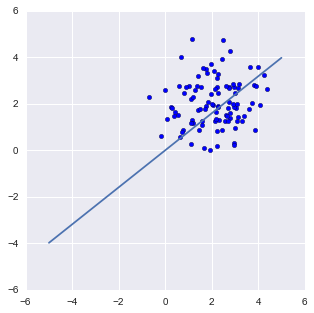

In [22]:
regr = skl_lm.LinearRegression()
regr.fit(x.reshape(-1,1),y.reshape(-1,1))
print(regr.coef_)
print(regr.intercept_)
est = smf.OLS(y,x).fit()
print est.summary().tables[1], est.params
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=x, y=y)
ax.plot((-5,5),(-5*est.params[0],5*est.params[0]))


[[ 0.11474655]]
[ 1.86229467]
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8419      0.059     14.178      0.000         0.724     0.960
============================================================================== [ 0.8419345]


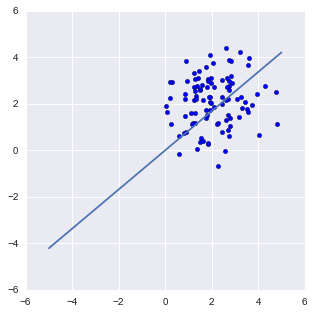

In [23]:
regr = skl_lm.LinearRegression()
regr.fit(y.reshape(-1,1),x.reshape(-1,1))
print(regr.coef_)
print(regr.intercept_)
est2 = smf.OLS(x,y).fit()
print est2.summary().tables[1], est2.params
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=y, y=x)
ax.plot((-5,5),(-5*est2.params[0],5*est2.params[0]))
